<a href="https://colab.research.google.com/gist/sameelll/c6503be6cd6c11fa85e6c7448a5b63ae/cnns_mnist_data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNNs MNIST DATA PROJECT**

# UPLOADS

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train,y_train), (X_test,y_test)= mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# PART 1: THE DATA

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
single_image = X_train[2]

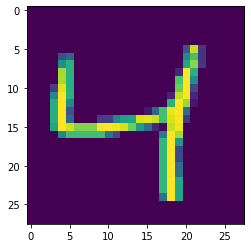

In [ ]:
plt.imshow(single_image)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_example = to_categorical(y_train)

In [ ]:
y_example.shape

(60000, 10)

In [ ]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [ ]:
y_cat_train = to_categorical(y_train,num_classes=10)

In [ ]:
X_train = X_train/255

In [ ]:
X_test = X_test/255

In [ ]:
scaled_image = X_train[2]

In [ ]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

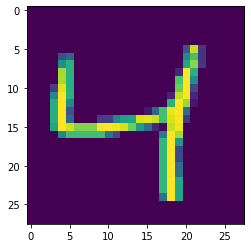

In [ ]:
plt.imshow(scaled_image)

In [ ]:
#batch_size,width,height,color_channels
X_train = X_train.reshape(60000,28,28,1)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_test = X_test.reshape(10000,28,28,1)

# PART 2: CREATING AND TRAINING THE MODEL

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [ ]:
28*28

784

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [ ]:
model.fit(X_train,y_cat_train,epochs=10,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1368 - accuracy: 0.9590 - val_loss: 0.0544 - val_accuracy: 0.9806
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0464 - accuracy: 0.9857 - val_loss: 0.0431 - val_accuracy: 0.9858
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0298 - accuracy: 0.9903 - val_loss: 0.0389 - val_accuracy: 0.9866
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0199 - accuracy: 0.9938 - val_loss: 0.0385 - val_accuracy: 0.9874
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0144 - accuracy: 0.9954 - val_loss: 0.0357 - val_accuracy: 0.9881
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0107 - accuracy: 0.9966 - val_loss: 0.0437 - val_accuracy: 0.9879


# Part 3: MODEL EVALUATION

In [ ]:
metrics = pd.DataFrame(model.history.history)

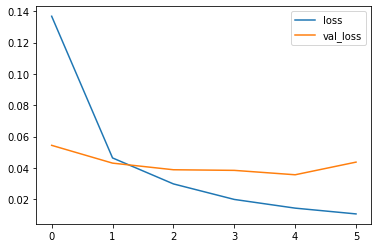

In [ ]:
metrics[['loss','val_loss']].plot()

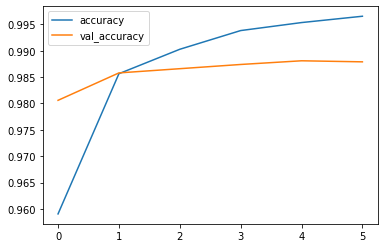

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
confusion_matrix(y_test,predictions)

array([[ 975,    1,    0,    1,    0,    0,    3,    0,    0,    0],
       [   0, 1132,    1,    0,    0,    0,    1,    1,    0,    0],
       [   2,    0, 1019,    1,    1,    0,    2,    7,    0,    0],
       [   0,    0,    1,  999,    0,    5,    0,    2,    3,    0],
       [   0,    1,    0,    0,  974,    0,    4,    0,    0,    3],
       [   1,    0,    0,    4,    0,  883,    2,    1,    1,    0],
       [   2,    1,    0,    0,    2,    3,  950,    0,    0,    0],
       [   0,    2,    6,    0,    0,    0,    0, 1018,    0,    2],
       [   6,    2,    5,    1,    1,    0,    4,    3,  948,    4],
       [   2,    1,    1,    0,   10,    3,    0,   10,    1,  981]])

# Part 4: PREDICT A NEW VALUE

In [ ]:
my_number = X_test[1]

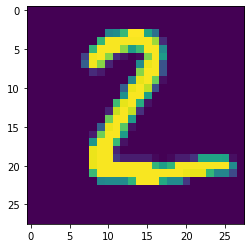

In [ ]:
plt.imshow(my_number.reshape(28,28))

In [ ]:
# num_images,width,height,color_channels
model.predict_classes(my_number.reshape(1,28,28,1))

array([2])